In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ai_assistant_usage_student_life.csv')

# Show the first 5 rows
df.head()


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [7]:
# Check basic info
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [8]:
df.drop(columns=['SessionID', 'SessionDate'], inplace=True)


In [9]:
df['UsedAgain'] = df['UsedAgain'].astype(int)


In [10]:
df = pd.get_dummies(df, columns=['StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome'], drop_first=True)


In [11]:
df.head()


,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,UsedAgain,SatisfactionRating,StudentLevel_High School,StudentLevel_Undergraduate,Discipline_Business,Discipline_Computer Science,Discipline_Engineering,...,Discipline_Math,Discipline_Psychology,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing,FinalOutcome_Confused,FinalOutcome_Gave Up,FinalOutcome_Idea Drafted
0,31.20,11,2,1,1.0,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,13.09,6,3,1,2.0,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2,19.22,5,3,1,3.3,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,3.70,1,3,1,3.5,False,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,28.12,9,3,1,2.9,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


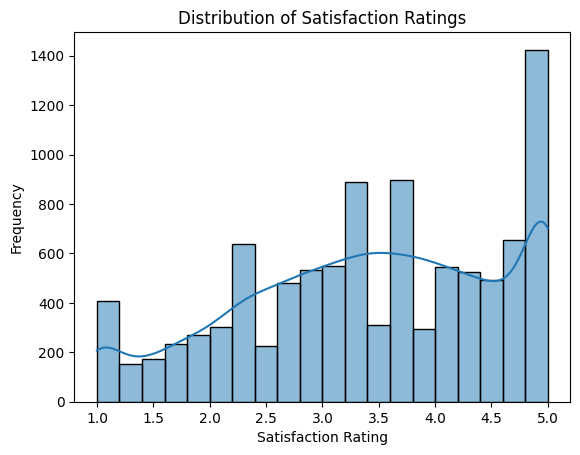

In [13]:
sns.histplot(df['SatisfactionRating'], bins=20, kde=True)
plt.title("Distribution of Satisfaction Ratings")
plt.xlabel("Satisfaction Rating")
plt.ylabel("Frequency")
plt.show()


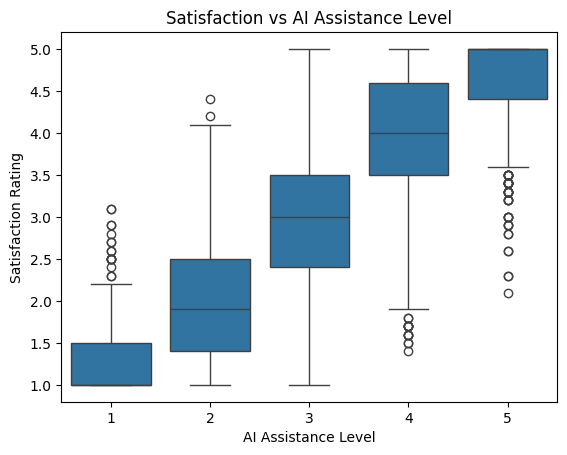

In [14]:
sns.boxplot(x='AI_AssistanceLevel', y='SatisfactionRating', data=df)
plt.title("Satisfaction vs AI Assistance Level")
plt.xlabel("AI Assistance Level")
plt.ylabel("Satisfaction Rating")
plt.show()


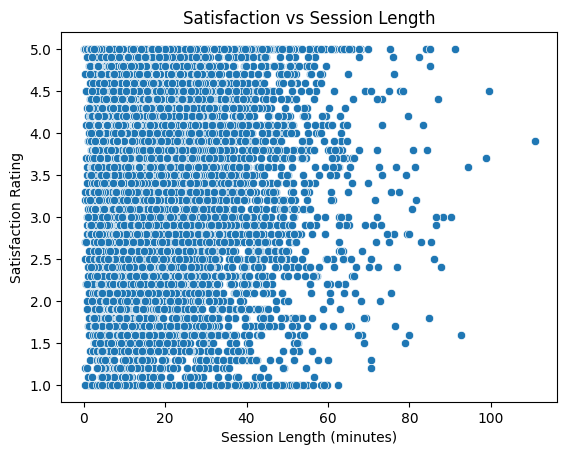

In [15]:
sns.scatterplot(x='SessionLengthMin', y='SatisfactionRating', data=df)
plt.title("Satisfaction vs Session Length")
plt.xlabel("Session Length (minutes)")
plt.ylabel("Satisfaction Rating")
plt.show()


In [17]:
df['label'] = df['SatisfactionRating'].apply(lambda x: 1 if x >= 3.5 else 0)


In [18]:
df.drop(columns=['SatisfactionRating'], inplace=True)


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)  # Features
y = df['label']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[747 217]
 [234 802]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77       964
           1       0.79      0.77      0.78      1036

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



In [3]:
df = df.drop(columns=['SessionID', 'SessionDate'])


In [4]:
df['UsedAgain'] = df['UsedAgain'].astype(int)


In [5]:
df = pd.get_dummies(df, columns=['StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome'], drop_first=True)
